In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import cobra

from dGbyG.config import train_data_path
from dGbyG.utils.custom_tools import rapid_linear_reg
from dGbyG.network.Dataset import Train_Dataset

color1 = (100/256,170/256,220/256)
color2 = (241/256,183/256,39/256)
color3 = (162/256,205/256,133/256)
color4 = (256/256,130/256,210/256)
color5 = (139/256,139/256,255/256)

label_fs = 10
legend_fs = 10

Reading the training data

In [22]:
TrainingData_df = pd.read_csv(train_data_path)
equation = TrainingData_df.loc[:, 'reaction']
standard_dG_prime = TrainingData_df.loc[:, 'standard_dg_prime']
TrainSet = Train_Dataset(equations=equation, dGs=standard_dG_prime)

print('dG num:', equation.shape[0])
print('molecules num:', TrainSet.S.shape[0])

dG num: 675
molecules num: 641


#### Fig. S1

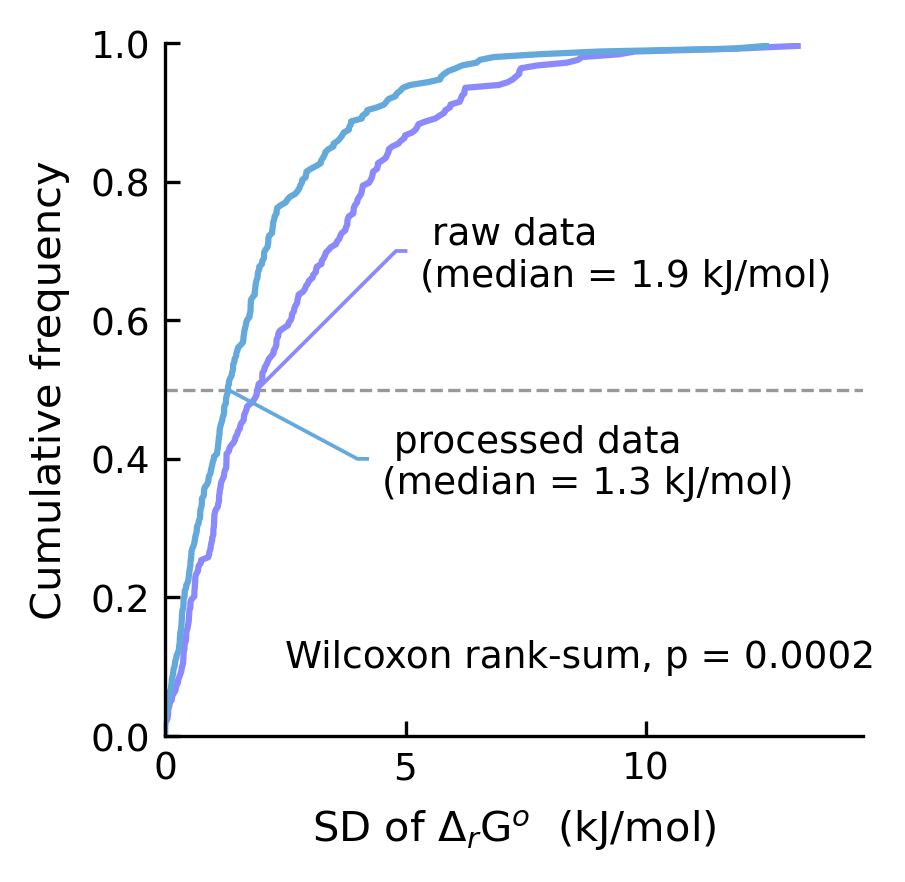

In [25]:
plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

nontrans_SD = TrainingData_df.loc[:,'nontrans_std'].copy().to_numpy()
trans_SD = TrainingData_df.loc[:,'std'].copy().to_numpy()

y = np.array(range(sum(~np.isnan(nontrans_SD))))/sum(~np.isnan(nontrans_SD))

nontrans_SD, trans_SD = nontrans_SD[~np.isnan(nontrans_SD)], trans_SD[~np.isnan(nontrans_SD)]
_, p_value = scipy.stats.ranksums(nontrans_SD, trans_SD)
scipy.stats.median_test(nontrans_SD, trans_SD)

nontrans_SD.sort()
trans_SD.sort()

plt.plot(nontrans_SD, y, linewidth=1.5, color=color5)
plt.plot(trans_SD, y, linewidth=1.5, color=color1)
plt.axhline(y=0.5, c = 'gray', linestyle = '--', linewidth=0.8, zorder=0, alpha=0.8)

plt.plot([np.median(nontrans_SD), 4.8, 5], [0.5, 0.7, 0.7], linewidth=0.9, color=color5)
plt.plot([np.median(trans_SD), 4.0, 4.2], [0.5, 0.4, 0.4], linewidth=0.9, color=color1)

plt.text(s=' raw data \n(median = {0} kJ/mol)'.format(np.round(np.median(nontrans_SD),1)), 
         x=5.3, y=0.65, fontsize=9)
plt.text(s=' processed data \n(median = {0} kJ/mol)'.format(np.round(np.median(trans_SD),1)), 
         x=4.5, y=0.35, fontsize=9)
#plt.legend(['before transformation', 'after transformation'], fontsize=8, frameon=True, loc=(0.3,0.1))
plt.text(s='Wilcoxon rank-sum, p = {0}'.format(np.round(p_value,4)), x=2.5, y=0.1, fontsize=9)

plt.ylabel(r'Cumulative frequency'.format(chr(920)), fontsize=10, labelpad=5)
plt.xlabel(r'SD of $\Delta$$_{0}$G$^{1}$  (kJ/mol)'.format('r', chr(959)), fontsize=10, labelpad=5)

plt.xlim(0,14.5)
plt.ylim(0,1)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

#### Fig. S2

The linear model is: Y = 0.0049431 * X + 1.7482
PearsonRResult(statistic=0.08558096461949133, pvalue=0.17914654680676884)
SignificanceResult(statistic=0.21441295066734897, pvalue=0.0006759872803590389)


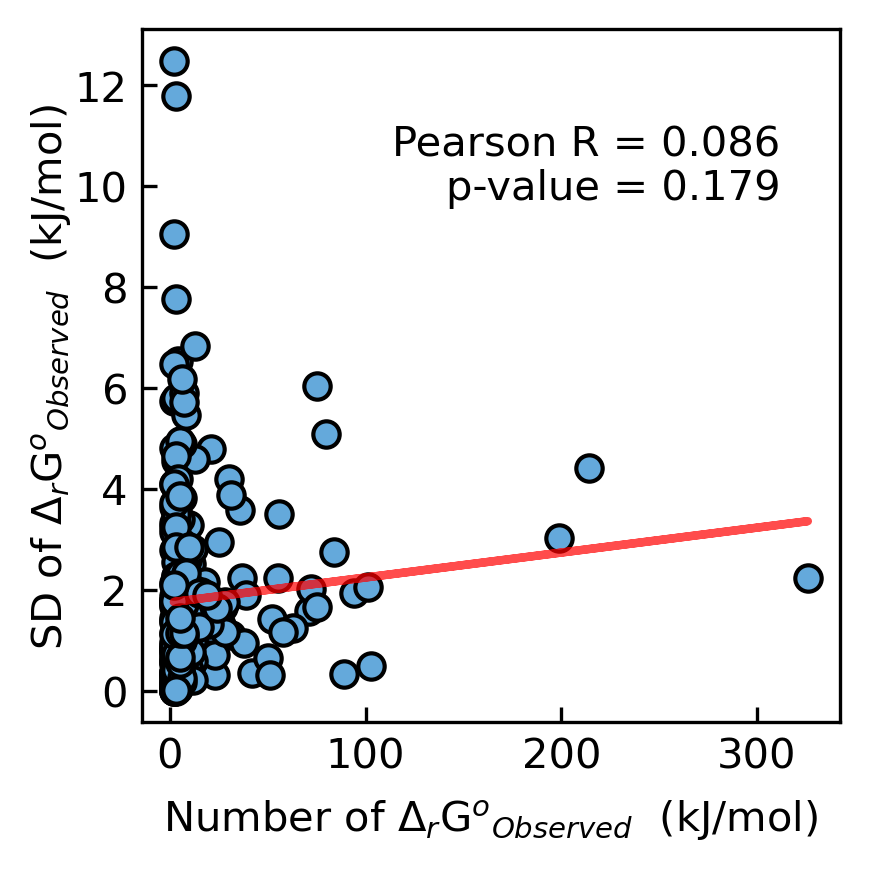

In [15]:
have_sd = pd.notna(TrainingData_df.loc[:,'std']) & (TrainingData_df.loc[:,'type']=='reaction dg')

plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = TrainingData_df.loc[:,'n'][have_sd]
y = TrainingData_df.loc[:,'std'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.344, y=min(y)+(max(y)-min(y))*0.85, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.43, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel(r'Number of $\Delta$$_{0}$G$^{1}$$_{2}$  (kJ/mol)'.format('r', chr(959),'{Observed}'), fontsize=10, labelpad=5)
plt.ylabel(r'SD of $\Delta$$_{0}$G$^{1}$$_{2}$  (kJ/mol)'.format('r', chr(959),'{Observed}'), fontsize =10, labelpad=0)


plt.show()


The linear model is: Y = 0.024501 * X + 1.5548
PearsonRResult(statistic=0.12308767590152812, pvalue=0.052872389781663184)
SignificanceResult(statistic=0.17220731341774131, pvalue=0.006556642241485819)


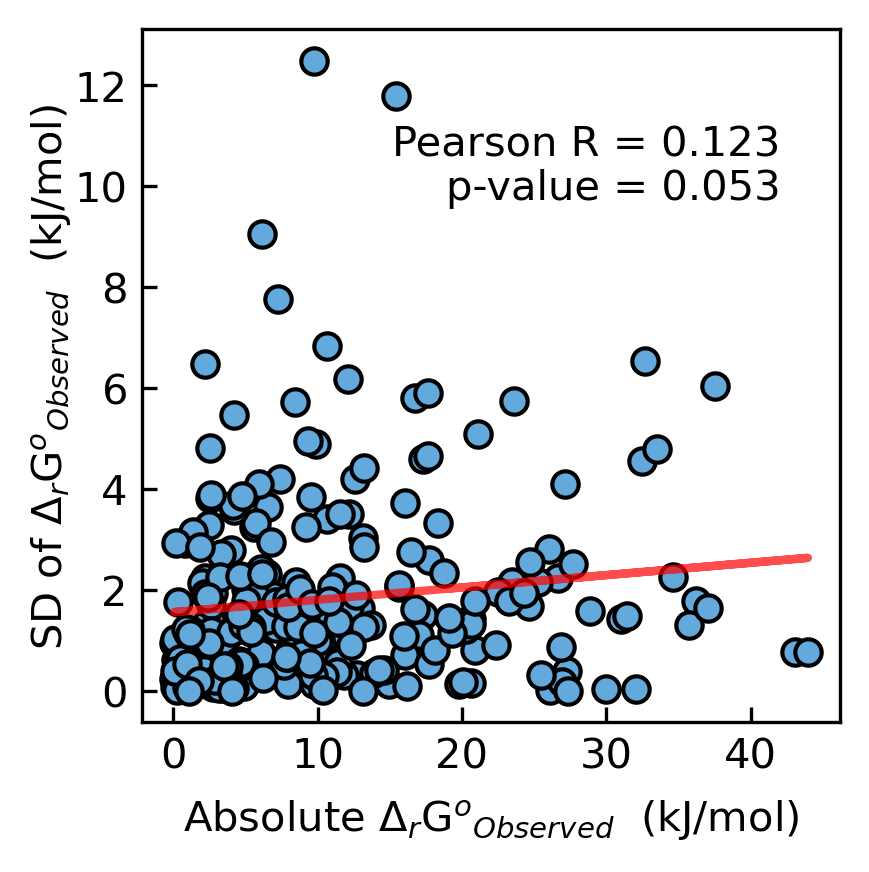

In [17]:
plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = abs(TrainingData_df.loc[:,'standard_dg_prime'][have_sd])
y = TrainingData_df.loc[:,'std'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.344, y=min(y)+(max(y)-min(y))*0.85, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.43, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

plt.xlabel(r'Absolute $\Delta$$_{0}$G$^{1}$$_{2}$  (kJ/mol)'.format('r', chr(959),'{Observed}'), fontsize=10, labelpad=5)
plt.ylabel(r'SD of $\Delta$$_{0}$G$^{1}$$_{2}$  (kJ/mol)'.format('r', chr(959),'{Observed}'), fontsize =10, labelpad=0)

plt.show()

The linear model is: Y = 1.6756 * X + 0.044531
PearsonRResult(statistic=0.2953976180335371, pvalue=2.1959329203199057e-06)
SignificanceResult(statistic=0.21512216468987672, pvalue=0.0006480797347304736)


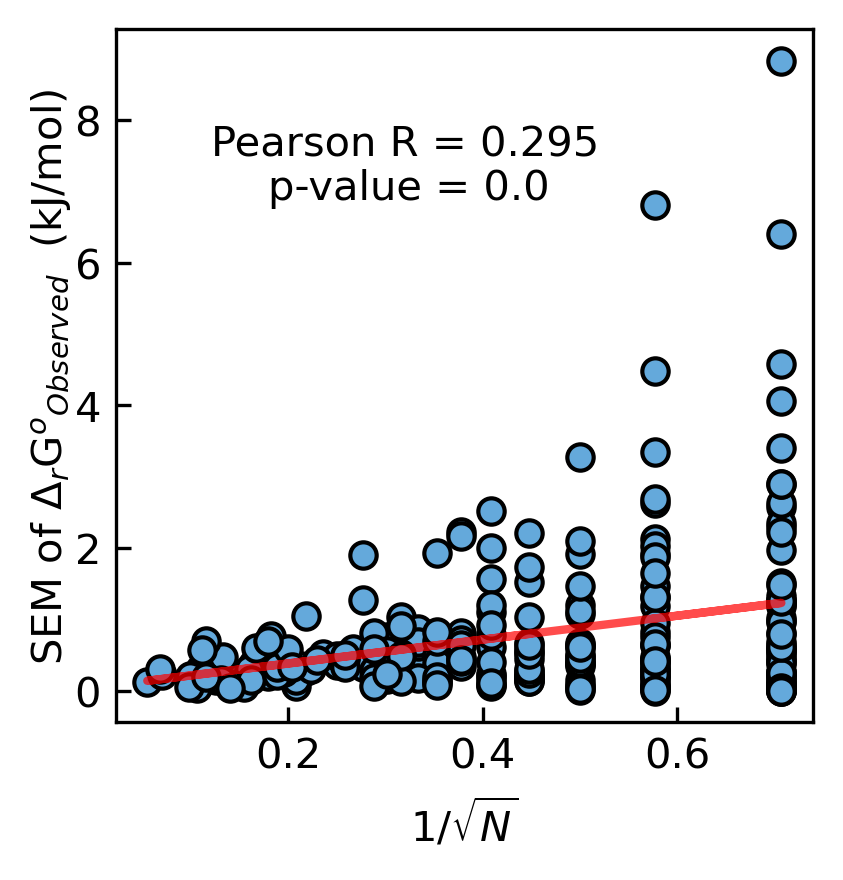

In [18]:
plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = 1/np.sqrt(TrainingData_df.loc[:,'n'][have_sd])
y = TrainingData_df.loc[:,'SEM'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.10, y=min(y)+(max(y)-min(y))*0.85, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.19, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

#xlabel = r'Number of $\Delta$G$^{0}$$_{1}$'.format(chr(920), '{Observed}')
plt.xlabel(r'1/$\sqrt{N}$', fontsize=10, labelpad=5)
plt.ylabel(r'SEM of $\Delta$$_{0}$G$^{1}$$_{2}$  (kJ/mol)'.format('r', chr(959),'{Observed}'), fontsize =10, labelpad=0)

plt.show()

#### Fig. S3

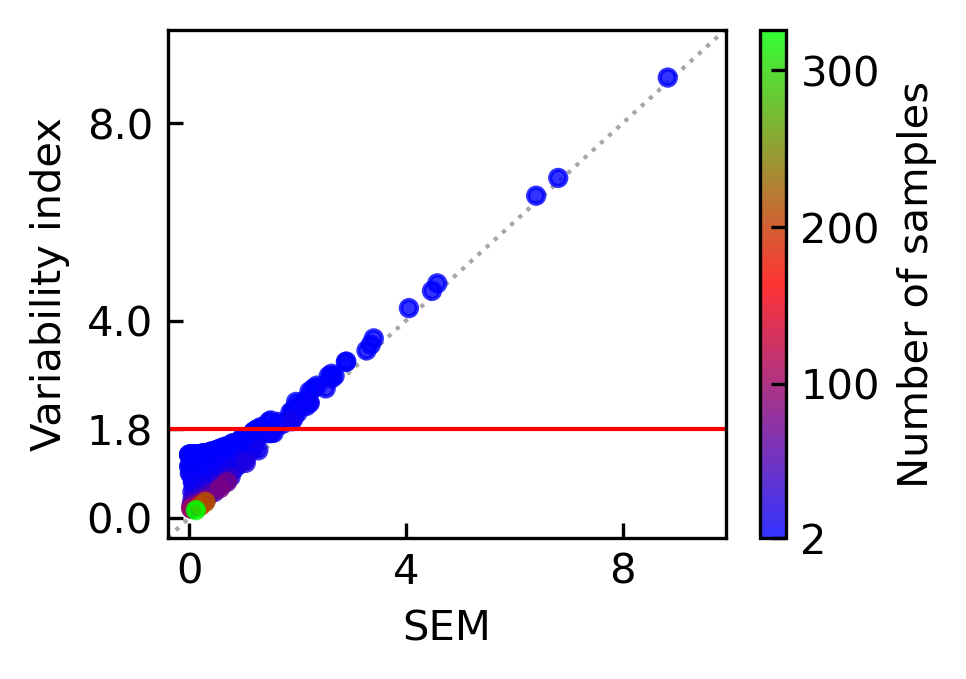

In [11]:
mean_std = TrainingData_df.loc[:,'std'].mean()
mean_std
Scale = []
for n, sem in zip(TrainingData_df.loc[:,'n'], TrainingData_df.loc[:,'SEM']):
    if np.isnan(sem):
        scale = mean_std
    else:
        scale = (sem**2 + mean_std**2/n)**0.5
    Scale.append(scale)
Scale = np.array(Scale)

df = pd.DataFrame([TrainingData_df.loc[:,'SEM'], Scale, TrainingData_df.loc[:,'n']]).T#.rename(columns={1:'A'})
df.columns = ['SEM', 'a', 'n']
df = df.sort_values(by='n')

plt.figure(dpi=300, figsize=(3,2.2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.plot([-1,10], [-1,10], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle=':')
plt.scatter(df.loc[:,'SEM'], df.loc[:,'a'], c=df.loc[:,'n'], cmap='brg', alpha=0.8, s=15)
plt.plot([-1,10], [mean_std, mean_std], color='r', linewidth=1)

plt.xlabel('SEM')
plt.ylabel('Variability index')
plt.xlim(-0.4,9.9)
plt.ylim(-0.4,9.9)
plt.xticks([0,4,8])
plt.yticks([0,np.round(mean_std,1),4,8])

cb = plt.colorbar()
cb.set_label('Number of samples')
cb.set_ticks([2,100,200,300])
plt.show()

#### Fig. S4

In [4]:
# Recon3D's standard Gibbs energy of formation
recon3d_dGf_dGbyG = pd.read_csv('../data/Recon3D/Recon3D_standard_dGf_dGbyG.csv', index_col=0)
recon3d_dGf_eQuilibrator = pd.read_csv('../data/Recon3D/Recon3D_standard_dGf_eQuilibrator.csv', index_col=0)
recon3d_dGf_dGPredictor = pd.read_csv('../data/Recon3D/Recon3D_standard_dGf_dGPredictor.csv', index_col=1).iloc[:,[1,2]]

recon3d_met_id_list = np.array([id[:-3] for id in recon3d_dGf_dGbyG.index])
recon3d_met_ids = set(recon3d_met_id_list)
recon3d_total_number = len(recon3d_met_ids)

recon3d_dGbyG_coverage = sum([recon3d_dGf_dGbyG.iloc[id==recon3d_met_id_list,0].notna().any() for id in recon3d_met_ids])
recon3d_eQ_coverage = sum([recon3d_dGf_eQuilibrator.iloc[id==recon3d_met_id_list,0].notna().any() for id in recon3d_met_ids])
recon3d_dGP_coverage = sum([recon3d_dGf_dGPredictor.iloc[id==recon3d_met_id_list,0].notna().any() for id in recon3d_met_ids])

In [5]:
# Human1's standard Gibbs energy of formation
human1_dGf_dGbyG = pd.read_csv('../data/Human1/Human1_standard_dGf_dGbyG.csv', index_col=0)
human1_dGf_eQuilibrator = pd.read_csv('../data/Human1/Human1_standard_dGf_eQuilibrator.csv', index_col=0)
human1_dGf_dGPredictor = pd.read_csv('../data/Human1/Human1_standard_dGf_dGPredictor.csv', index_col=1).iloc[:,[1,2]]

human1_met_id_list = np.array([id[:-1] for id in human1_dGf_dGbyG.index])
human1_met_ids = set(human1_met_id_list)
human1_total_number = len(human1_met_ids)

human1_dGbyG_coverage = sum([human1_dGf_dGbyG.iloc[id==human1_met_id_list,0].notna().any() for id in human1_met_ids])
human1_eQ_coverage = sum([human1_dGf_eQuilibrator.iloc[id==human1_met_id_list,0].notna().any() for id in human1_met_ids])
human1_dGP_coverage = sum([human1_dGf_dGPredictor.iloc[id==human1_met_id_list,0].notna().any() for id in human1_met_ids])

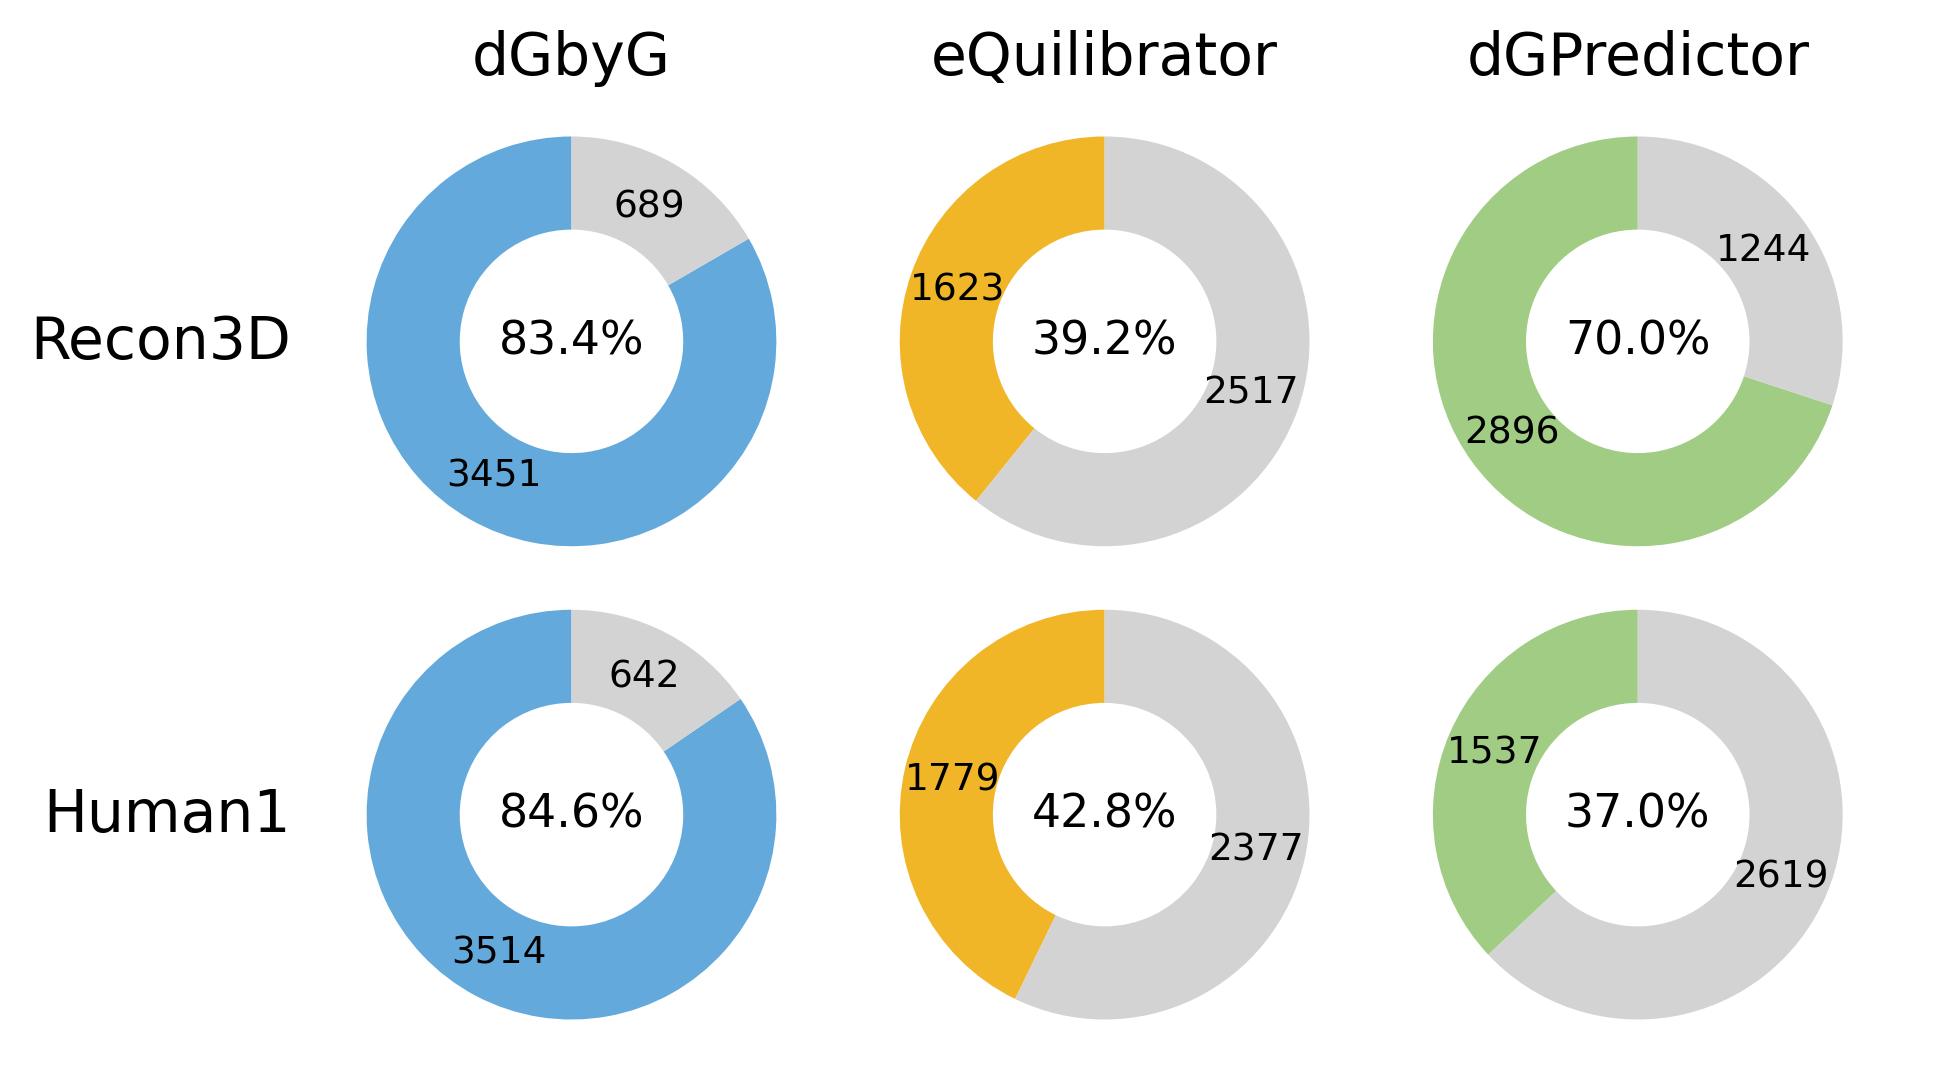

In [6]:
def my_pct(x):
    return str(int(x*recon3d_total_number/100))

def my_pie_plot(sizes, colors):
    plt.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.5, edgecolor='none'), radius=1.1,
            labels=sizes, labeldistance=0.76, textprops={'fontsize': label_fs-1, 'ha':'center', 'va':'center'},)
    plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
    plt.text(0, 0, s=str(round(sizes[0]/sum(sizes)*100, 1)) + '%', fontsize=label_fs+1, ha='center', va='center')


plt.figure(dpi=300,figsize = (7,4))
plt.subplots_adjust(wspace=-0.05, hspace=0.05)
#plt.suptitle(t='Coverage rates on reactions within Recon3D', fontsize=35, x=0.53, y=1.1)

plt.subplot(2, 3, 1)
plt.title('dGbyG', fontsize=label_fs+4, pad=10)
plt.ylabel('Recon3D', fontsize=label_fs+4, labelpad=0, rotation=0, va='center', ha='right')
sizes = [recon3d_dGbyG_coverage, recon3d_total_number-recon3d_dGbyG_coverage] # 每一块的比例
colors=[color1, 'lightgray']
my_pie_plot(sizes, colors)

plt.subplot(2, 3, 2)
plt.title('eQuilibrator', fontsize=label_fs+4, pad=10)
sizes = [recon3d_eQ_coverage, recon3d_total_number-recon3d_eQ_coverage]
colors=[color2, 'lightgray']
my_pie_plot(sizes, colors)

plt.subplot(2, 3, 3)
plt.title('dGPredictor', fontsize=label_fs+4, pad=10)
sizes = [recon3d_dGP_coverage, recon3d_total_number-recon3d_dGP_coverage]
colors=[color3, 'lightgray']
my_pie_plot(sizes, colors)


plt.subplot(2, 3, 4)
plt.ylabel('Human1', fontsize=label_fs+4, labelpad=0, rotation=0, va='center', ha='right')
sizes = [human1_dGbyG_coverage, human1_total_number-human1_dGbyG_coverage] # 每一块的比例
colors=[color1, 'lightgray']
my_pie_plot(sizes, colors)

plt.subplot(2, 3, 5)
sizes = [human1_eQ_coverage, human1_total_number-human1_eQ_coverage]
colors=[color2, 'lightgray']
my_pie_plot(sizes, colors)

plt.subplot(2, 3, 6)
sizes = [human1_dGP_coverage, human1_total_number-human1_dGP_coverage]
colors=[color3, 'lightgray']
my_pie_plot(sizes, colors)

plt.show()

#### Table S2

In [215]:
from rdkit.Chem.rdchem import Atom, Bond, HybridizationType, ChiralType, BondType, BondStereo

In [217]:
[x.lower() for x in HybridizationType.names.keys()]

['unspecified', 's', 'sp', 'sp2', 'sp3', 'sp2d', 'sp3d', 'sp3d2', 'other']

In [220]:
[x.lower() for x in BondType.names.keys()]

['unspecified',
 'single',
 'double',
 'triple',
 'quadruple',
 'quintuple',
 'hextuple',
 'oneandahalf',
 'twoandahalf',
 'threeandahalf',
 'fourandahalf',
 'fiveandahalf',
 'aromatic',
 'ionic',
 'hydrogen',
 'threecenter',
 'dativeone',
 'dative',
 'dativel',
 'dativer',
 'other',
 'zero']